In [226]:
#First import necessary libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install wordcloud

This is the analysis of a survey conducted for the entire 300 level students.
A few things to note: 
1. DE computer engineering students in 300 level = 17
2. UTME computer engineering students in 300 level = 31
3. Total Computer engineering students in 300 level = 48
4. DE electrical engineering students in 300 level = 32
5. UTME electrical engineering students = 65
6. Total Electrical engineering students in 300 level = 97

Also note that computer and electrical students share the same class, both departments practically offer the same courses in 300 level and the survey lasted for 2 weeks.


In [227]:
#Reading the dataset into variable df
df = pd.read_csv("jupyter/Student survey on learning preferences.csv")
df.head() #Dispalying the first 5 rows of the dataframe

,Timestamp,Name( First name and Last name ),Nationality,Name of secondary school,Mode of entry into University,Department,Did you skip primary 6?,Did you skip SS3?,Would you rather receive lectures online or in your classroom?,State reason why you prefer either,Can you read a course and understand it without being taught by your lecturers ?,Select your prefered reading mode (select all that apply),On a scale of (1-5) grade your learning in class (university),If less than 3 give reasons,On a scale of (1-5) grade learning on your own,On a scale of (1-5) grade your attendance record in all classes
0,2019/09/16 7:13:56 PM GMT+1,Arinze Owoh,Nigerian,Nigerian Turkish International Colleges Abuja,UTME,Electrical Engineering,No,No,Classroom,I can ask more questions and learn more intera...,Yes,Hard Copy Materials;Soft Copy Materials;Online...,4,NaN,2,3
1,2019/09/16 7:57:10 PM GMT+1,Ifeakor Nnaemeka Praise,Nigerian,Unique Heights,UTME,Computer Engineering,No,No,Online,I prefer online because I don't learn in the c...,Yes,Hard Copy Materials;Soft Copy Materials;Online...,2,Most Lecturers don't calm down to teach They r...,4,3
2,2019/09/16 8:06:52 PM GMT+1,Nwachukwu Chidiebere Godwin,Nigerian,Federal Science and Technical college,UTME,Computer Engineering,Yes,No,Online,Because it's self paced and free from clusters...,Yes,Hard Copy Materials;Soft Copy Materials;Online...,1,I find it hard to pay attention in a classroom...,5,4
3,2019/09/16 8:18:40 PM GMT+1,Bello Oluwatomisin Oreoluwa,Nigerian,Effortswill Academy,UTME,Electrical Engineering,No,No,Classroom,NaN,Yes,Soft Copy Materials;Online lectures and videos...,3,NaN,1,3
4,2019/09/16 8:21:42 PM GMT+1,Boss,Nigerian,Lumen Christi,DE,Computer Engineering,Yes,No,Classroom,Never done online,Yes,Hard Copy Materials;Past questions,3,NaN,4,3


In [228]:
#lets see the column names
df.columns.values 

array(['Timestamp', 'Name( First name and Last name )', 'Nationality',
       'Name of secondary school', 'Mode of entry into University',
       'Department ', 'Did you skip primary 6?', 'Did you skip SS3?',
       'Would you rather receive lectures online or in your classroom? ',
       'State reason why you prefer either',
       'Can you read a course and understand it without being taught by your lecturers ?',
       'Select your prefered reading mode (select all that apply) ',
       'On a scale of (1-5) grade your learning in class (university)',
       'If less than 3 give reasons',
       'On a scale of (1-5) grade learning on your own',
       'On a scale of (1-5) grade your attendance record in all classes '],
      dtype=object)

The column names are too long. Renaming them would be better to ease selection and slicing.

In [229]:
#renaming the column names
df.rename({'Name( First name and Last name )':'Name', 'Nationality':'Nationality',
       'Name of secondary school':'High-School', 'Mode of entry into University':'Entry-mode',
       'Department ':'Dept', 'Did you skip primary 6?':'Skip6', 'Did you skip SS3?':'Skip12',
       'Would you rather receive lectures online or in your classroom? ':'Lect-pref',
       'State reason why you prefer either':'Reason-for-Lect-pref',
       'Can you read a course and understand it without being taught by your lecturers ?':'Self-learn',
       'Select your prefered reading mode (select all that apply) ':'Read-mode',
       'On a scale of (1-5) grade your learning in class (university)':'Classlearn-grade',
       'If less than 3 give reasons':'Reason-for-Classlearn-grade',
       'On a scale of (1-5) grade learning on your own':'Selflearn-grade',
       'On a scale of (1-5) grade your attendance record in all classes ':'Attend-grade'}, axis = 1, inplace = True)

In [230]:
df.head(2) #the first two rows

,Timestamp,Name,Nationality,High-School,Entry-mode,Dept,Skip6,Skip12,Lect-pref,Reason-for-Lect-pref,Self-learn,Read-mode,Classlearn-grade,Reason-for-Classlearn-grade,Selflearn-grade,Attend-grade
0,2019/09/16 7:13:56 PM GMT+1,Arinze Owoh,Nigerian,Nigerian Turkish International Colleges Abuja,UTME,Electrical Engineering,No,No,Classroom,I can ask more questions and learn more intera...,Yes,Hard Copy Materials;Soft Copy Materials;Online...,4,NaN,2,3
1,2019/09/16 7:57:10 PM GMT+1,Ifeakor Nnaemeka Praise,Nigerian,Unique Heights,UTME,Computer Engineering,No,No,Online,I prefer online because I don't learn in the c...,Yes,Hard Copy Materials;Soft Copy Materials;Online...,2,Most Lecturers don't calm down to teach They r...,4,3


In [231]:
#To save the renamed dataframe for future use in 
save_df = df.to_csv("df1.csv")


In [242]:
#Let's select the features with categorical and numerical values
a = df.columns.to_list() #convert column values to list
df_1 = df[[a[1], a[2], a[4], a[5], a[6], a[7], a[8], a[10], a[12], a[14], a[15]]]
df_1.head()

,Name,Nationality,Entry-mode,Dept,Skip6,Skip12,Lect-pref,Self-learn,Classlearn-grade,Selflearn-grade,Attend-grade
0,Arinze Owoh,Nigerian,UTME,Electrical Engineering,No,No,Classroom,Yes,4,2,3
1,Ifeakor Nnaemeka Praise,Nigerian,UTME,Computer Engineering,No,No,Online,Yes,2,4,3
2,Nwachukwu Chidiebere Godwin,Nigerian,UTME,Computer Engineering,Yes,No,Online,Yes,1,5,4
3,Bello Oluwatomisin Oreoluwa,Nigerian,UTME,Electrical Engineering,No,No,Classroom,Yes,3,1,3
4,Boss,Nigerian,DE,Computer Engineering,Yes,No,Classroom,Yes,3,4,3


In [243]:
#To check out the shape of the dataframe
df_1.shape

(89, 11)

Only 89 out of 145 people filled the survey. That is more than 60% or 3/5th of the set. The responses therefore constitute significantly to the validity of the subject matter of the survey.

In [244]:
#To set the name as the index
df_1.set_index('Name', inplace = True)
df_1.index.values

array(['Arinze Owoh', 'Ifeakor Nnaemeka Praise',
       'Nwachukwu Chidiebere Godwin ', 'Bello Oluwatomisin Oreoluwa ',
       'Boss', 'Tungbulu Douye Paul ', 'Babatunde Iteoluwakishi ',
       'Igboanugo Chisom', 'Ayomide Aderonmu', 'Alese Michael Toluwani ',
       'Manakanz', 'Favour Adepoju', 'Urhiofe favour', 'Anonymous ',
       'Sina', 'Udensi Mmesoma', 'Seyi', 'Pretty AIce', 'Leon ',
       'Catherine Olorunfemi', 'Shada', '*****', 'Adekogbe Favour',
       'Stephen', 'Makanjuola Yussuf Adetola', 'Wrilliyana',
       'Daniel Anozie', 'Adeleye Temilade ', 'Paul-Sodipo Giovanni',
       'Adebiyi Charles', 'Samuel-Ugwuezi Ebube', 'Haleem Bello',
       'Bashir Raji', 'Hamzat Kareemat ', 'Toluwanimi Ogunbona',
       'Charles Onuoha', 'Daniel Arikawe ', 'Da-Walang Simi', 'Morayo',
       'Daniel Agan', 'Obinna Amadi', 'Ojo Comfort ', 'Babalola Praise',
       'Excellent Osunkoya', 'Susan Alabi', 'Taiwo hammed',
       'Ajayi Hassan', 'Kolade Amusat', 'Godspower Innocent',
       'A

If you check the index, there is a certain someone who has his/her name as "*****"(Just after Shada). This person's name is Favour Edwards. There is also someone named anonymous. That person is not really known but it is way better than the former.

In [245]:
#Renaming this index
df_1.rename({'*****': "Favour Edwards"}, axis = 0, inplace = True)
df_1.index.values

array(['Arinze Owoh', 'Ifeakor Nnaemeka Praise',
       'Nwachukwu Chidiebere Godwin ', 'Bello Oluwatomisin Oreoluwa ',
       'Boss', 'Tungbulu Douye Paul ', 'Babatunde Iteoluwakishi ',
       'Igboanugo Chisom', 'Ayomide Aderonmu', 'Alese Michael Toluwani ',
       'Manakanz', 'Favour Adepoju', 'Urhiofe favour', 'Anonymous ',
       'Sina', 'Udensi Mmesoma', 'Seyi', 'Pretty AIce', 'Leon ',
       'Catherine Olorunfemi', 'Shada', 'Favour Edwards',
       'Adekogbe Favour', 'Stephen', 'Makanjuola Yussuf Adetola',
       'Wrilliyana', 'Daniel Anozie', 'Adeleye Temilade ',
       'Paul-Sodipo Giovanni', 'Adebiyi Charles', 'Samuel-Ugwuezi Ebube',
       'Haleem Bello', 'Bashir Raji', 'Hamzat Kareemat ',
       'Toluwanimi Ogunbona', 'Charles Onuoha', 'Daniel Arikawe ',
       'Da-Walang Simi', 'Morayo', 'Daniel Agan', 'Obinna Amadi',
       'Ojo Comfort ', 'Babalola Praise', 'Excellent Osunkoya',
       'Susan Alabi', 'Taiwo hammed', 'Ajayi Hassan', 'Kolade Amusat',
       'Godspower Inno

In [246]:
#Just to confirm.
df_1.loc['Favour Edwards', :]

Nationality                      Nigerian 
Entry-mode                              DE
Dept                Electrical Engineering
Skip6                                   No
Skip12                                  No
Lect-pref                        Classroom
Self-learn                             Yes
Classlearn-grade                         4
Selflearn-grade                          4
Attend-grade                             4
Name: Favour Edwards, dtype: object

In [247]:
#Now to check the data frame for missing values
df_1.isna().sum()

Nationality         0
Entry-mode          0
Dept                0
Skip6               0
Skip12              0
Lect-pref           0
Self-learn          0
Classlearn-grade    0
Selflearn-grade     0
Attend-grade        0
dtype: int64

In [248]:
#There are no missing values
df_1.head()

,Nationality,Entry-mode,Dept,Skip6,Skip12,Lect-pref,Self-learn,Classlearn-grade,Selflearn-grade,Attend-grade
Name,,,,,,,,,,
Arinze Owoh,Nigerian,UTME,Electrical Engineering,No,No,Classroom,Yes,4,2,3
Ifeakor Nnaemeka Praise,Nigerian,UTME,Computer Engineering,No,No,Online,Yes,2,4,3
Nwachukwu Chidiebere Godwin,Nigerian,UTME,Computer Engineering,Yes,No,Online,Yes,1,5,4
Bello Oluwatomisin Oreoluwa,Nigerian,UTME,Electrical Engineering,No,No,Classroom,Yes,3,1,3
Boss,Nigerian,DE,Computer Engineering,Yes,No,Classroom,Yes,3,4,3


In [249]:
df_1.dtypes #To check for the data type of the columns

Nationality         object
Entry-mode          object
Dept                object
Skip6               object
Skip12              object
Lect-pref           object
Self-learn          object
Classlearn-grade     int64
Selflearn-grade      int64
Attend-grade         int64
dtype: object

In [250]:
#Lets clean up the nationalities for patriotic sake
df_1.Nationality.values

array(['Nigerian', 'Nigerian', 'Nigerian ', 'Nigerian', 'Nigerian',
       'Nigeria', 'Nigerian ', 'Nigerian', 'Nigerian', 'Nigerian',
       'Dutch ', 'Nigeria', 'Nigerian', 'Nigeria ', 'Nigerian ',
       'Nigerian', 'Nigerian', 'Nigerian', 'Nigerian ', 'Nigerian',
       'Nigeria', 'Nigerian ', 'Nigerian', 'Nigeria', 'Nigerian',
       'Nigerian', 'Nigeria ', 'Nigeria ', 'Nigerian ', 'Nigerian',
       'Nigerian', 'Nigerian', 'Nigerian', 'Nigerian', 'Nigerian',
       'Nigerian', 'Nigerian', 'Nigerian', 'nigerian ', 'Nigerian',
       'Nigerian', 'Nigerian ', 'Nigerian', 'Nigerian', 'Nigeria',
       'Nigeria ', 'Nigerian', 'Nigerian ', 'Nigeria', 'NIGERIA ',
       'Nigerian ', 'Nigerian ', 'Nigerian', 'Nigerian ', 'Nigeria',
       'Nigerian', 'Nigerian', 'Nigerian', 'Nigerian', 'Nigerian ',
       'Nigerian', 'NIGERIA', 'Nigerian', 'Nigerian ', 'Nigerian ',
       'Nigerian', 'Nigeria', 'Nigerian', 'Nigerian', 'Nigeria',
       'Nigerian ', 'Nigerian', 'Nigeria ', 'Nigeria', 'Nig

In [251]:
#To check the most unique 
df_1.Nationality.unique()

array(['Nigerian', 'Nigerian ', 'Nigeria', 'Dutch ', 'Nigeria ',
       'nigerian ', 'NIGERIA ', 'NIGERIA', 'Ghanaian'], dtype=object)

In [252]:
#To count the number of unique values
df_1.Nationality.value_counts()

Nigerian     47
Nigerian     18
Nigeria      14
Nigeria       5
Dutch         1
NIGERIA       1
nigerian      1
Ghanaian      1
NIGERIA       1
Name: Nationality, dtype: int64

In [253]:
#Conventionally, we know everyone who filled the survey is of Nigerian descent.
df_1.Nationality.value_counts().idxmax()

'Nigerian'

In [254]:
#Renaming the columns
df_1.replace(['Nigerian', 'Nigerian ', 'Nigeria', 'Dutch ', 'Nigeria ',
       'nigerian ', 'NIGERIA ', 'NIGERIA', 'Ghanaian'], 'Nigerian', inplace = True)
df_1.Nationality.value_counts()

Nigerian    89
Name: Nationality, dtype: int64

In [59]:
df_1.columns.values

array(['Nationality', 'Entry-mode', 'Dept', 'Skip6', 'Skip12',
       'Lect-pref', 'Self-learn', 'Classlearn-grade', 'Selflearn-grade',
       'Attend-grade'], dtype=object)

To check the data frame with object values for pre-processing

In [60]:
object_df =  df_1.select_dtypes(include = 'object')
object_df.head()


,Nationality,Entry-mode,Dept,Skip6,Skip12,Lect-pref,Self-learn
Name,,,,,,,
Arinze Owoh,Nigerian,UTME,Electrical Engineering,No,No,Classroom,Yes
Ifeakor Nnaemeka Praise,Nigerian,UTME,Computer Engineering,No,No,Online,Yes
Nwachukwu Chidiebere Godwin,Nigerian,UTME,Computer Engineering,Yes,No,Online,Yes
Bello Oluwatomisin Oreoluwa,Nigerian,UTME,Electrical Engineering,No,No,Classroom,Yes
Boss,Nigerian,DE,Computer Engineering,Yes,No,Classroom,Yes


In [61]:
#Now for the Entry-mode;
object_df['Entry-mode'].unique()

array(['UTME', 'DE'], dtype=object)

In [62]:
object_df['Entry-mode'].value_counts()

UTME    58
DE      31
Name: Entry-mode, dtype: int64

In [63]:
object_df['Entry-mode'].value_counts().idxmax()


'UTME'

In [64]:
#Let's check out the Departmental values
object_df.Dept.value_counts()

Electrical Engineering    52
Computer Engineering      37
Name: Dept, dtype: int64

In [65]:
object_df.Dept.value_counts().idxmax()

'Electrical Engineering'

In [66]:
#Now to go back to the data frame
object_df.head()


,Nationality,Entry-mode,Dept,Skip6,Skip12,Lect-pref,Self-learn
Name,,,,,,,
Arinze Owoh,Nigerian,UTME,Electrical Engineering,No,No,Classroom,Yes
Ifeakor Nnaemeka Praise,Nigerian,UTME,Computer Engineering,No,No,Online,Yes
Nwachukwu Chidiebere Godwin,Nigerian,UTME,Computer Engineering,Yes,No,Online,Yes
Bello Oluwatomisin Oreoluwa,Nigerian,UTME,Electrical Engineering,No,No,Classroom,Yes
Boss,Nigerian,DE,Computer Engineering,Yes,No,Classroom,Yes


In [67]:
object_df[['Entry-mode', 'Dept']].head()


,Entry-mode,Dept
Name,,
Arinze Owoh,UTME,Electrical Engineering
Ifeakor Nnaemeka Praise,UTME,Computer Engineering
Nwachukwu Chidiebere Godwin,UTME,Computer Engineering
Bello Oluwatomisin Oreoluwa,UTME,Electrical Engineering
Boss,DE,Computer Engineering


In [68]:
object_df.shape
#There are 89 rows


(89, 7)

In [69]:
count_DE_elect = 0
count_DE_computer = 0
count_UTME_elect = 0
count_UTME_computer = 0
a = object_df['Entry-mode'].values
b = object_df['Dept'].values
for values in range(89): #Because there are 89 rows
    if a[values] == 'UTME' and b[values] == 'Electrical Engineering':
        count_UTME_elect += 1
        continue
    elif a[values] == 'UTME' and b[values] == 'Computer Engineering':
        count_UTME_computer += 1
        continue
    elif a[values] == 'DE' and b[values] == 'Electrical Engineering':
        count_DE_elect += 1
        continue
    else:
        count_DE_computer += 1
if count_DE_elect + count_DE_computer + count_UTME_elect + count_UTME_computer == 89:
    print('There are', count_UTME_elect, 'UTME Elecrtical students,', count_UTME_computer, 'UTME Computer students,',
      count_DE_elect,' DE Electrical students and', count_DE_computer, 
      ' DE Computer students that participated in the survey')

There are 34 UTME Elecrtical students, 24 UTME Computer students, 18  DE Electrical students and 13  DE Computer students that participated in the survey


In [178]:
#Creating a new dataframe
plot_df = pd.DataFrame({'UTME': [count_UTME_elect, count_UTME_computer], 'DE': [count_DE_elect, count_DE_computer]},
                   index = ['Electrical Engineering', 'Computer Engineering'])
plot_df

,UTME,DE
Electrical Engineering,34,18
Computer Engineering,24,13


In [179]:
plot_df["Total"] = plot_df.sum(axis = 1)
plot_df

,UTME,DE,Total
Electrical Engineering,34,18,52
Computer Engineering,24,13,37


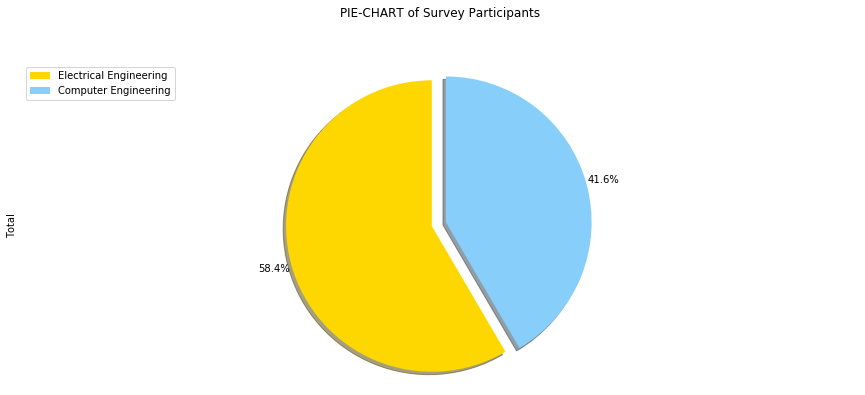

In [180]:
colors_list = ['gold', 'lightskyblue']
explode_list = [0.1, 0]

plot_df['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list
                            )

plt.title('PIE-CHART of Survey Participants', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(plot_df.index, loc='upper left') 

plt.show()

In [72]:
#Now back to the dataframe
object_df.head()

,Nationality,Entry-mode,Dept,Skip6,Skip12,Lect-pref,Self-learn
Name,,,,,,,
Arinze Owoh,Nigerian,UTME,Electrical Engineering,No,No,Classroom,Yes
Ifeakor Nnaemeka Praise,Nigerian,UTME,Computer Engineering,No,No,Online,Yes
Nwachukwu Chidiebere Godwin,Nigerian,UTME,Computer Engineering,Yes,No,Online,Yes
Bello Oluwatomisin Oreoluwa,Nigerian,UTME,Electrical Engineering,No,No,Classroom,Yes
Boss,Nigerian,DE,Computer Engineering,Yes,No,Classroom,Yes


In [73]:
#To find out how many people skipped primary 6
object_df.Skip6.value_counts()

No     53
Yes    36
Name: Skip6, dtype: int64

In [74]:
#To find out how many students skipped ss3
object_df.Skip12.value_counts()

No    89
Name: Skip12, dtype: int64

In [75]:
#To find out the Lecture preference of all students students
object_df['Lect-pref'].value_counts()

Classroom    59
Online       30
Name: Lect-pref, dtype: int64

In [76]:
#To find out how many students can learn on their own
object_df['Self-learn'].value_counts()

Yes    75
No     14
Name: Self-learn, dtype: int64

One important thing to note from the last two observations is that although more people prefer to learn in the classroom than via online tutoring, more people claim to be able to learn on their own without any form of tutoring. Infact, more than 80% of the students that participated in the survey filled in 'Yes' which clearly beats the 66% that prefer to learn in the classroom.

In [77]:
#Now to go back to the original dataframe of df_1
df_1.head()

,Nationality,Entry-mode,Dept,Skip6,Skip12,Lect-pref,Self-learn,Classlearn-grade,Selflearn-grade,Attend-grade
Name,,,,,,,,,,
Arinze Owoh,Nigerian,UTME,Electrical Engineering,No,No,Classroom,Yes,4,2,3
Ifeakor Nnaemeka Praise,Nigerian,UTME,Computer Engineering,No,No,Online,Yes,2,4,3
Nwachukwu Chidiebere Godwin,Nigerian,UTME,Computer Engineering,Yes,No,Online,Yes,1,5,4
Bello Oluwatomisin Oreoluwa,Nigerian,UTME,Electrical Engineering,No,No,Classroom,Yes,3,1,3
Boss,Nigerian,DE,Computer Engineering,Yes,No,Classroom,Yes,3,4,3


In [78]:
#Let's deal with the integer values
int_df = df_1.select_dtypes(include = 'number')
int_df.head()

,Classlearn-grade,Selflearn-grade,Attend-grade
Name,,,
Arinze Owoh,4,2,3
Ifeakor Nnaemeka Praise,2,4,3
Nwachukwu Chidiebere Godwin,1,5,4
Bello Oluwatomisin Oreoluwa,3,1,3
Boss,3,4,3


**Do note that the grading scheme is over 5**

In [79]:
#For the Class grade, let's find out about the number of people that chose 3 and below
int_df['Classlearn-grade'].value_counts()


3    42
2    24
1    14
4     7
5     2
Name: Classlearn-grade, dtype: int64

In [80]:
bins = np.linspace(int_df['Classlearn-grade'].min(), int_df['Classlearn-grade'].max(), num = 4)
bins

array([1.        , 2.33333333, 3.66666667, 5.        ])

In [81]:
group_names = ['Below Average', 'Average', 'Above Average']
#To grade the new dataframe
new_a = int_df[['Classlearn-grade']]
new_a.columns

Index(['Classlearn-grade'], dtype='object')

In [182]:
new_a['Classlearn-grade-binned'] = pd.cut(int_df['Classlearn-grade'], bins, labels=group_names, include_lowest=True )
new_a[['Classlearn-grade','Classlearn-grade-binned']].head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Classlearn-grade,Classlearn-grade-binned
Name,,
Arinze Owoh,4,Above Average
Ifeakor Nnaemeka Praise,2,Below Average
Nwachukwu Chidiebere Godwin,1,Below Average
Bello Oluwatomisin Oreoluwa,3,Average
Boss,3,Average


In [83]:
#To see the number of people that fall in each bin category
new_a['Classlearn-grade-binned'].value_counts()

Average          42
Below Average    38
Above Average     9
Name: Classlearn-grade-binned, dtype: int64

In [84]:
a = new_a['Classlearn-grade-binned'].value_counts()
a.index.to_list()

['Average', 'Below Average', 'Above Average']

Text(0.5, 1.0, 'Bar plot of Classlearn-grade')

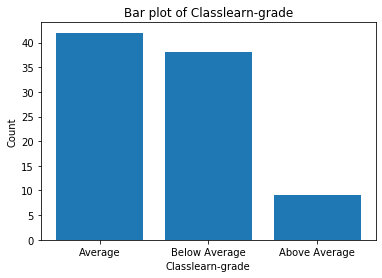

In [183]:
#plotting the chart
plt.bar(a.index.to_list(), new_a["Classlearn-grade-binned"].value_counts())

plt.xlabel("Classlearn-grade")
plt.ylabel("Count")
plt.title("Bar plot of Classlearn-grade")

In [86]:
#Now, for self learn grade:
int_df['Selflearn-grade'].value_counts()

4    42
5    20
3    20
2     5
1     2
Name: Selflearn-grade, dtype: int64

In [87]:
#The same process is repeated
new_b = int_df[['Selflearn-grade']]
new_b['Selflearn-grade-binned'] = pd.cut(int_df['Selflearn-grade'], bins, labels=group_names, include_lowest=True )
new_b[['Selflearn-grade','Selflearn-grade-binned']].head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Selflearn-grade,Selflearn-grade-binned
Name,,
Arinze Owoh,2,Below Average
Ifeakor Nnaemeka Praise,4,Above Average
Nwachukwu Chidiebere Godwin,5,Above Average
Bello Oluwatomisin Oreoluwa,1,Below Average
Boss,4,Above Average


In [88]:
b = new_b['Selflearn-grade-binned'].value_counts()
b

Above Average    62
Average          20
Below Average     7
Name: Selflearn-grade-binned, dtype: int64

Text(0.5, 1.0, 'Bar plot of Selflearn-grade')

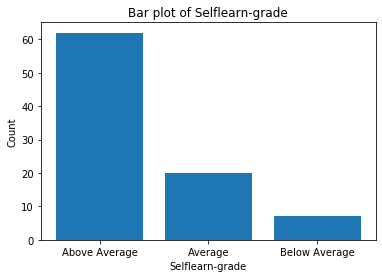

In [184]:
#plotting the chart
plt.bar(b.index.to_list(), new_b["Selflearn-grade-binned"].value_counts())

plt.xlabel("Selflearn-grade")
plt.ylabel("Count")
plt.title("Bar plot of Selflearn-grade")

In [90]:
#to find the mean grade for learning in class, learning on your own and attendance:
print('Mean grade for learning in class, learning on your own and attendance'+
      ' record is {0}, {1} {2}'.format(round(int_df['Classlearn-grade'].mean(), 4), 
        round(int_df['Selflearn-grade'].mean(), 4), round(int_df['Attend-grade'].mean(), 4)))

Mean grade for learning in class, learning on your own and attendance record is 2.5393, 3.8202 3.7079


In [91]:
#Here is the bar chart representation
clg_mean =round(int_df['Classlearn-grade'].mean(), 4)
slf_mean = round(int_df['Selflearn-grade'].mean(), 4) 
att_mean = round(int_df['Attend-grade'].mean(), 4)
                    
bar_df = pd.DataFrame({'Mean-Grade': [clg_mean, slf_mean, att_mean]}, 
                       index = ['Learning in Class', 'Learning on your own', 'Attendance record'])
bar_df

,Mean-Grade
Learning in Class,2.5393
Learning on your own,3.8202
Attendance record,3.7079


Text(0.5, 1.0, 'Bar Chart of mean Learning grades')

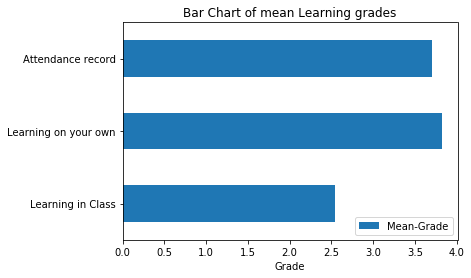

In [185]:
bar_df.plot.barh()
plt.xlabel('Grade')
plt.title('Bar Chart of mean Learning grades')

From the above plot, it seems that more people attend classes and learn on their own than they learn in class. This is shocking because i expected it to be a little conventional. The reason for this insight is analysed below.

In [93]:
#Now back to the first data frame dataframe df
df.head(2)

,Timestamp,Name,Nationality,High-School,Entry-mode,Dept,Skip6,Skip12,Lect-pref,Reason-for-Lect-pref,Self-learn,Read-mode,Classlearn-grade,Reason-for-Classlearn-grade,Selflearn-grade,Attend-grade
0,2019/09/16 7:13:56 PM GMT+1,Arinze Owoh,Nigerian,Nigerian Turkish International Colleges Abuja,UTME,Electrical Engineering,No,No,Classroom,I can ask more questions and learn more intera...,Yes,Hard Copy Materials;Soft Copy Materials;Online...,4,NaN,2,3
1,2019/09/16 7:57:10 PM GMT+1,Ifeakor Nnaemeka Praise,Nigerian,Unique Heights,UTME,Computer Engineering,No,No,Online,I prefer online because I don't learn in the c...,Yes,Hard Copy Materials;Soft Copy Materials;Online...,2,Most Lecturers don't calm down to teach They r...,4,3


In [94]:
#To work with the reasons for Lect-pref and reasons for classlearn-grade
reason = df[['Reason-for-Lect-pref', 'Reason-for-Classlearn-grade']]
reason.head()

,Reason-for-Lect-pref,Reason-for-Classlearn-grade
0,I can ask more questions and learn more intera...,NaN
1,I prefer online because I don't learn in the c...,Most Lecturers don't calm down to teach They r...
2,Because it's self paced and free from clusters...,I find it hard to pay attention in a classroom...
3,NaN,NaN
4,Never done online,NaN


In [95]:
#To check for the missing values
reason.isna().sum()

Reason-for-Lect-pref            7
Reason-for-Classlearn-grade    27
dtype: int64

In [96]:
#Since there are 27 missing values for Class learn grade, Let's look into the Name, Classlearn-grade and reason for 
#classlearn-grade
ax = df[df['Classlearn-grade'] < 3] #Because people only gave reasons for less than 3
ax.shape

(38, 16)

In [97]:
#There are now only 38 rows
new_ax = ax[['Name', 'Classlearn-grade', 'Reason-for-Classlearn-grade']]
new_ax.head()

,Name,Classlearn-grade,Reason-for-Classlearn-grade
1,Ifeakor Nnaemeka Praise,2,Most Lecturers don't calm down to teach They r...
2,Nwachukwu Chidiebere Godwin,1,I find it hard to pay attention in a classroom...
6,Babatunde Iteoluwakishi,2,Some lecturers aren’t audible\nSome lecturers ...
7,Igboanugo Chisom,2,Most lecturers don’t teach for us to understan...
9,Alese Michael Toluwani,1,I basically don't learn anything. I'm presente...


In [98]:
#Resetting the index and setting the Name column as the index
new_ax.reset_index(drop = True)
new_ax.set_index('Name', inplace = True)
new_ax.head()

,Classlearn-grade,Reason-for-Classlearn-grade
Name,,
Ifeakor Nnaemeka Praise,2,Most Lecturers don't calm down to teach They r...
Nwachukwu Chidiebere Godwin,1,I find it hard to pay attention in a classroom...
Babatunde Iteoluwakishi,2,Some lecturers aren’t audible\nSome lecturers ...
Igboanugo Chisom,2,Most lecturers don’t teach for us to understan...
Alese Michael Toluwani,1,I basically don't learn anything. I'm presente...


In [99]:
#To see if there are still missing values
new_ax.isna().sum()

Classlearn-grade               0
Reason-for-Classlearn-grade    1
dtype: int64

In [100]:
#There is still one missing value, This row can be dropped
new_ax.dropna(inplace = True)
new_ax.isna().sum()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Classlearn-grade               0
Reason-for-Classlearn-grade    0
dtype: int64

In [101]:
#Now there are no missing values for the class learn grade
new_ax.head()

,Classlearn-grade,Reason-for-Classlearn-grade
Name,,
Ifeakor Nnaemeka Praise,2,Most Lecturers don't calm down to teach They r...
Nwachukwu Chidiebere Godwin,1,I find it hard to pay attention in a classroom...
Babatunde Iteoluwakishi,2,Some lecturers aren’t audible\nSome lecturers ...
Igboanugo Chisom,2,Most lecturers don’t teach for us to understan...
Alese Michael Toluwani,1,I basically don't learn anything. I'm presente...


In [102]:
new_ax.shape

(37, 2)

Now,  37 students graded less than 3 and gave reasons for their grade. This is more than 40% of the particpants. It would be informative to know what words were consistent in the reasons they all gave.


In [103]:
#Here is the wordcloud visualisation for the reasons given
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
x = new_ax['Reason-for-Classlearn-grade'].to_list()
#To convert to list to a string
def to_str(xs):
    string = ""
    return(string.join(xs))
string_x = to_str(x)

#instantiate wordcloud object
Classlearn_grade_wc = WordCloud(background_color = 'black', max_words = 5000, 
                               stopwords = stopwords)

#generating wordcloud
Classlearn_grade_wc.generate(string_x)


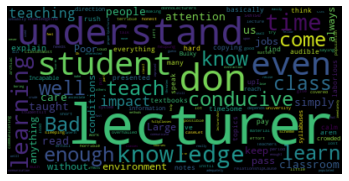

In [104]:
#Displaying the wordcloud
plt.imshow(Classlearn_grade_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()


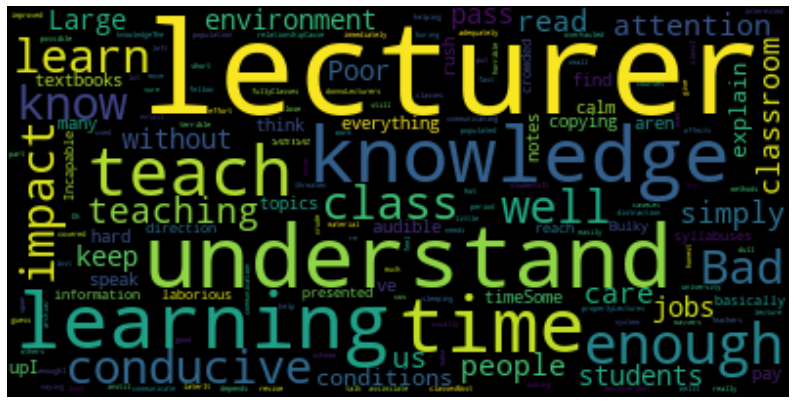

In [105]:
#The wordcloud looks good, but words like 'even', 'student', 'don', 'come', 'anything', 'taught' and 'always'
#Have no inherent meaning, Now to add those words to the stopwords:

stopwords.add('even')
stopwords.add('student')
stopwords.add('don')
stopwords.add('come') 
stopwords.add('anything')
stopwords.add('taught')
stopwords.add('always')

#regenrating the wordcloud
Classlearn_grade_wc.generate(string_x)

#displaying the wordlcoud and increasing the size
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(Classlearn_grade_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()


The biggest words here are *Lecturer, conducive, knowledge and understand*, let's see for the preferred lecture environment

In [106]:
#Now for the reasons for lect-pref, there are 7 missing values
reason['Reason-for-Lect-pref'].isna().sum()

7

In [107]:
#To get the Names, lect-pref and reason for lect pref, let's take a look at the datframe 'df' column vaulues
df.columns.values

array(['Timestamp', 'Name', 'Nationality', 'High-School', 'Entry-mode',
       'Dept', 'Skip6', 'Skip12', 'Lect-pref', 'Reason-for-Lect-pref',
       'Self-learn', 'Read-mode', 'Classlearn-grade',
       'Reason-for-Classlearn-grade', 'Selflearn-grade', 'Attend-grade'],
      dtype=object)

In [108]:
bx = df[['Name','Lect-pref', 'Reason-for-Lect-pref']]
#Setting the name as index
bx.set_index('Name', inplace = True)
#Checking the shape 
bx.shape

(89, 2)

Out of 89 responses, 7 people did not give reasons why they preferred being lectured online or in the Classroom. 
These 7 entries can be dropped and we'll have 82 responses to deal with, which makes up roughly 92% of the dataset which in the real sense is still very okay to work with.

In [109]:
#dropping the rows with missing values
bx.dropna(inplace = True)
#CrossChecking the dataframe
bx.isna().sum()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Lect-pref               0
Reason-for-Lect-pref    0
dtype: int64

In [110]:
bx.tail()

,Lect-pref,Reason-for-Lect-pref
Name,,
Okiki Oriola,Classroom,I just learn more when the teacher is physical...
Airat Agboola,Classroom,It is easy for you to ask questions and get an...
Victor Oguntunde,Classroom,I haven't experienced Online class before
Oluwajoba Fashogbon,Classroom,In class learning is more suitable than online...
Akintoye Faith,Online,For interaction


In [111]:
#For those that chose online
bx['Lect-pref'].value_counts()

Classroom    54
Online       28
Name: Lect-pref, dtype: int64

This indicates that more people prefer to be lectured in the classroom than **online**. This however isn't surprising because the main reason why anyone would prefer to learn in the classroom is due to the **physical interaction of students and lecturers.** In other words, it is easier to ask questions and get answers instantly. It is also easier to learn from questions asked by other students.

The fact that 28 out of 82 students i.e (almost 35%) picked **online** seems too significant to ignore. It would be informative to know the reasons why the minority picked **online** as their preferred environment for Lecture. 

In [112]:
#Selecting the dataset with only online preference.
online_pick = bx[bx['Lect-pref'] == 'Online']

#converting the reasons to list
lr = online_pick['Reason-for-Lect-pref'].to_list()

#converting the list to string
lr_string = "".join(lr)
type(lr_string)

str

In [113]:
#Here is a word cloud visualisation of the Reasons for online.
stopwords = set(STOPWORDS)

#instantiate wordcloud object
Reason_for_online_wc = WordCloud(background_color = 'black', max_words = 2000, 
                               stopwords = stopwords)

#generating wordcloud
Reason_for_online_wc.generate(lr_string)


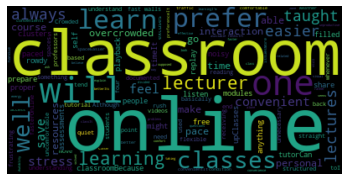

In [114]:
#displaying the wordcloud
plt.imshow(Reason_for_online_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

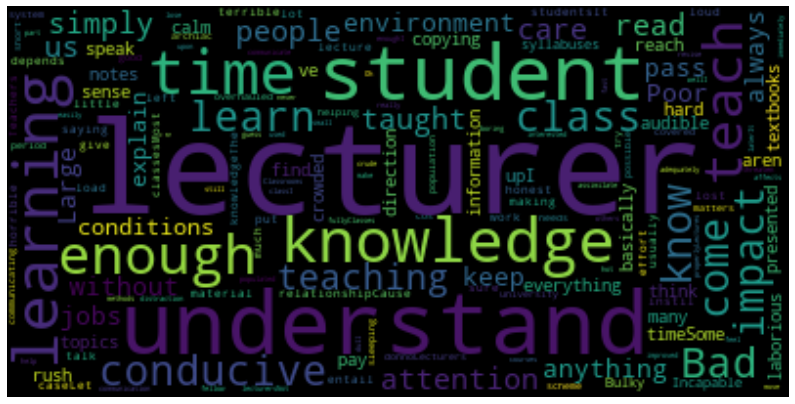

In [115]:
#The wordcloud looks good but words like 'classroom', 'one', 'classes', 'classroomBecause', 'will', 'upClasses'
#and 'well' have no inherent meaning 

stopwords.add('classroom')
stopwords.add('one')
stopwords.add('classes')
stopwords.add('classroomBecause') 
stopwords.add('will')
stopwords.add('well')
stopwords.add('upClasses')
stopwords.add('don')
stopwords.add('even')

#regenrating the wordcloud
Reason_for_online_wc.generate(string_x)

#displaying the wordlcoud and increasing the size
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(Reason_for_online_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

The word cloud diplays a visualisation of consistent words used in a string. The more a word is used, the bigger the word is in the cloud. Well two words are boldly displayed in the different wordclouds. These words are consistent and definitely scream two things:

1. The lecturers are the main reason why students graded their class learning less than 3.
2. The lecturers are the main reason why 28 out of 82 students prefer to learn **online**.




In [116]:
df.columns.values

array(['Timestamp', 'Name', 'Nationality', 'High-School', 'Entry-mode',
       'Dept', 'Skip6', 'Skip12', 'Lect-pref', 'Reason-for-Lect-pref',
       'Self-learn', 'Read-mode', 'Classlearn-grade',
       'Reason-for-Classlearn-grade', 'Selflearn-grade', 'Attend-grade'],
      dtype=object)

In [117]:
#Let us check out the read mode:
read = df[['Name','Dept', 'Read-mode']]
read.head()

,Name,Dept,Read-mode
0,Arinze Owoh,Electrical Engineering,Hard Copy Materials;Soft Copy Materials;Online...
1,Ifeakor Nnaemeka Praise,Computer Engineering,Hard Copy Materials;Soft Copy Materials;Online...
2,Nwachukwu Chidiebere Godwin,Computer Engineering,Hard Copy Materials;Soft Copy Materials;Online...
3,Bello Oluwatomisin Oreoluwa,Electrical Engineering,Soft Copy Materials;Online lectures and videos...
4,Boss,Computer Engineering,Hard Copy Materials;Past questions


In [118]:
#grouping the dataframe by the readmode
grup = read.groupby(['Read-mode'])

In [119]:
#To see the group keys
grup.groups.keys()

dict_keys(['Hard Copy Materials', 'Hard Copy Materials;Online lectures and videos', 'Hard Copy Materials;Online lectures and videos;Past questions', 'Hard Copy Materials;Past questions', 'Hard Copy Materials;Soft Copy Materials', 'Hard Copy Materials;Soft Copy Materials;Online lectures and videos', 'Hard Copy Materials;Soft Copy Materials;Online lectures and videos;Past questions', 'Hard Copy Materials;Soft Copy Materials;Past questions', 'Online lectures and videos', 'Online lectures and videos;Past questions', 'Soft Copy Materials', 'Soft Copy Materials;Online lectures and videos', 'Soft Copy Materials;Online lectures and videos;Past questions', 'Soft Copy Materials;Past questions'])

In [120]:
#To get the general idea of what is going in the dataframe
grup.describe()

Name         \
                                                   count unique   
Read-mode                                                         
Hard Copy Materials                                   12     12   
Hard Copy Materials;Online lectures and videos         3      3   
Hard Copy Materials;Online lectures and videos;...     6      6   
Hard Copy Materials;Past questions                     4      4   
Hard Copy Materials;Soft Copy Materials                8      8   
Hard Copy Materials;Soft Copy Materials;Online ...     9      9   
Hard Copy Materials;Soft Copy Materials;Online ...    19     19   
Hard Copy Materials;Soft Copy Materials;Past qu...     3      3   
Online lectures and videos                             3      3   
Online lectures and videos;Past questions              4      4   
Soft Copy Materials                                    6      6   
Soft Copy Materials;Online lectures and videos         6      6   
Soft Copy Materials;Online lectures and videos;...     5      5   
Soft Copy Materials;Past questions                     1      1   

                                                                               \
                                                                          top   
Read-mode                                                                       
Hard Copy Materials                                            Udensi Mmesoma   
Hard Copy Materials;Online lectures and videos              Adeleye Temilade    
Hard Copy Materials;Online lectures and videos;...                Susan Alabi   
Hard Copy Materials;Past questions                             Urhiofe favour   
Hard Copy Materials;Soft Copy Materials             Makanjuola Yussuf Adetola   
Hard Copy Materials;Soft Copy Materials;Online ...           Zaccheaus Elisha   
Hard Copy Materials;Soft Copy Materials;Online ...         Godspower Innocent   
Hard Copy Materials;Soft Copy Materials;Past qu...            Adepeju Adeleke   
Online lectures and videos                                     Otega Aweghele   
Online lectures and videos;Past questions                      AJANI OYINLOLA   
Soft Copy Materials                                             Daniel Anozie   
Soft Copy Materials;Online lectures and videos                Favour Buraimoh   
Soft Copy Materials;Online lectures and videos;...                 Wrilliyana   
Soft Copy Materials;Past questions                         Excellent Osunkoya   

                                                         Dept         \
                                                   freq count unique   
Read-mode                                                              
Hard Copy Materials                                   1    12      2   
Hard Copy Materials;Online lectures and videos        1     3      2   
Hard Copy Materials;Online lectures and videos;...    1     6      2   
Hard Copy Materials;Past questions                    1     4      2   
Hard Copy Materials;Soft Copy Materials               1     8      2   
Hard Copy Materials;Soft Copy Materials;Online ...    1     9      2   
Hard Copy Materials;Soft Copy Materials;Online ...    1    19      2   
Hard Copy Materials;Soft Copy Materials;Past qu...    1     3      1   
Online lectures and videos                            1     3      2   
Online lectures and videos;Past questions             1     4      2   
Soft Copy Materials                                   1     6      1   
Soft Copy Materials;Online lectures and videos        1     6      2   
Soft Copy Materials;Online lectures and videos;...    1     5      1   
Soft Copy Materials;Past questions                    1     1      1   

                                                                            \
                                                                       top   
Read-mode                                                                    
Hard Copy Materials                                 Electrical Engineering 

In [126]:
#To see how many keys are there in the dataframe
x = (grup.groups.keys())
len(x)

14

In [172]:
#to know the count of people that picked the reading mode
w = grup.Dept.value_counts()
print(w, type(w))

Read-mode                                                                          Dept                  
Hard Copy Materials                                                                Electrical Engineering     8
                                                                                   Computer Engineering       4
Hard Copy Materials;Online lectures and videos                                     Electrical Engineering     2
                                                                                   Computer Engineering       1
Hard Copy Materials;Online lectures and videos;Past questions                      Computer Engineering       3
                                                                                   Electrical Engineering     3
Hard Copy Materials;Past questions                                                 Computer Engineering       3
                                                                                   Electrical Engineering     

In [153]:
xf = w.to_frame(name = 'Count')
xf

Count
Read-mode                                          Dept                         
Hard Copy Materials                                Electrical Engineering      8
                                                   Computer Engineering        4
Hard Copy Materials;Online lectures and videos     Electrical Engineering      2
                                                   Computer Engineering        1
Hard Copy Materials;Online lectures and videos;... Computer Engineering        3
                                                   Electrical Engineering      3
Hard Copy Materials;Past questions                 Computer Engineering        3
                                                   Electrical Engineering      1
Hard Copy Materials;Soft Copy Materials            Computer Engineering        5
                                                   Electrical Engineering      3
Hard Copy Materials;Soft Copy Materials;Online ... Electrical Engineering      6
                                                   Computer Engineering        3
Hard Copy Materials;Soft Copy Materials;Online ... Computer Engineering       11
                                                   Electrical Engineering      8
Hard Copy Materials;Soft Copy Materials;Past qu... Electrical Engineering      3
Online lectures and videos                         Electrical Engineering      2
                                                   Computer Engineering        1
Online lectures and videos;Past questions          Computer Engineering        2
                                                   Electrical Engineering      2
Soft Copy Materials                                Electrical Engineering      6
Soft Copy Materials;Online lectures and videos     Computer Engineering        4
                                                   Electrical Engineering      2
Soft Copy Materials;Online lectures and videos;... Electrical Engineering      5
Soft Copy Materials;Past questions                 Electrical Engineering      1

In [162]:
#To reset the index
xf_reset = xf.reset_index(level = ['Read-mode','Dept'])
xf_reset.index.values


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [163]:
#A quick peek into the new dataframe
xf_reset.head()

,Read-mode,Dept,Count
0,Hard Copy Materials,Electrical Engineering,8
1,Hard Copy Materials,Computer Engineering,4
2,Hard Copy Materials;Online lectures and videos,Electrical Engineering,2
3,Hard Copy Materials;Online lectures and videos,Computer Engineering,1
4,Hard Copy Materials;Online lectures and videos...,Computer Engineering,3


In [171]:
#Obtaining a pivot table
pivot_df = xf_reset.pivot(index='Read-mode', columns='Dept').fillna(0)
pivot_df.to_csv('read mode pivot table.csv')
pivot_df

Count  \
Dept                                               Computer Engineering   
Read-mode                                                                 
Hard Copy Materials                                                 4.0   
Hard Copy Materials;Online lectures and videos                      1.0   
Hard Copy Materials;Online lectures and videos;...                  3.0   
Hard Copy Materials;Past questions                                  3.0   
Hard Copy Materials;Soft Copy Materials                             5.0   
Hard Copy Materials;Soft Copy Materials;Online ...                  3.0   
Hard Copy Materials;Soft Copy Materials;Online ...                 11.0   
Hard Copy Materials;Soft Copy Materials;Past qu...                  0.0   
Online lectures and videos                                          1.0   
Online lectures and videos;Past questions                           2.0   
Soft Copy Materials                                                 0.0   
Soft Copy Materials;Online lectures and videos                      4.0   
Soft Copy Materials;Online lectures and videos;...                  0.0   
Soft Copy Materials;Past questions                                  0.0   

                                                                           
Dept                                               Electrical Engineering  
Read-mode                                                                  
Hard Copy Materials                                                   8.0  
Hard Copy Materials;Online lectures and videos                        2.0  
Hard Copy Materials;Online lectures and videos;...                    3.0  
Hard Copy Materials;Past questions                                    1.0  
Hard Copy Materials;Soft Copy Materials                               3.0  
Hard Copy Materials;Soft Copy Materials;Online ...                    6.0  
Hard Copy Materials;Soft Copy Materials;Online ...                    8.0  
Hard Copy Materials;Soft Copy Materials;Past qu...                    3.0  
Online lectures and videos                                            2.0  
Online lectures and videos;Past questions                             2.0  
Soft Copy Materials                                                   6.0  
Soft Copy Materials;Online lectures and videos                        2.0  
Soft Copy Materials;Online lectures and videos;...                    5.0  
Soft Copy Materials;Past questions                                    1.0

Text(0.5, 1.0, 'Bar Chart of preferred Reading mode of Students')

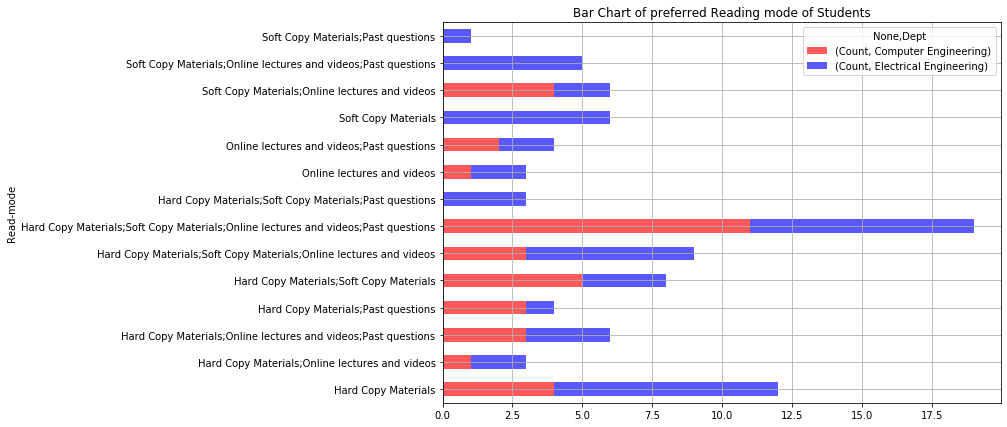

In [192]:
#Visualising the data
colors = ['red','blue']
pivot_df.plot.barh(stacked=True, color=colors, figsize=(10,7), grid = True, alpha = 0.65)
plt.title('Bar Chart of preferred Reading mode of Students')

*This notebook was created by Ifeakor Nnaemeka Praise, a computer engineering student of the University of Lagos. At the time this analysis was done, he was in 300 level.*


**DISCLAIMER: The insights obtained from the dataset does not directly in reality reflect the opinion of the analyst or the students that participated in the survey. The survey was carried out specifically for educational, analytical and exploratory purposes only.**